In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def analytical_soln(x, T_A, T_B, L, q, k):
    return (((T_B-T_A)/L)+(q*(L-x))/(2*k))*x + T_A

[0.    0.004 0.008 0.012 0.016 0.02 ]
[373. 457. 509. 529. 517. 473.]
[0.00000000e+00 0.00000000e+00 5.68434189e-14 1.13686838e-13
 0.00000000e+00 0.00000000e+00]


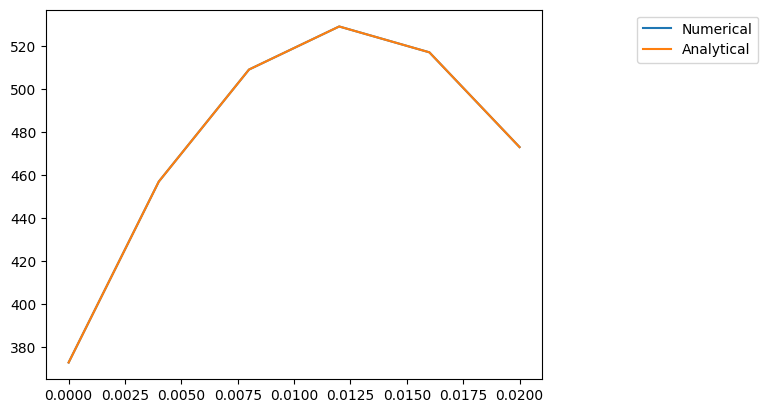

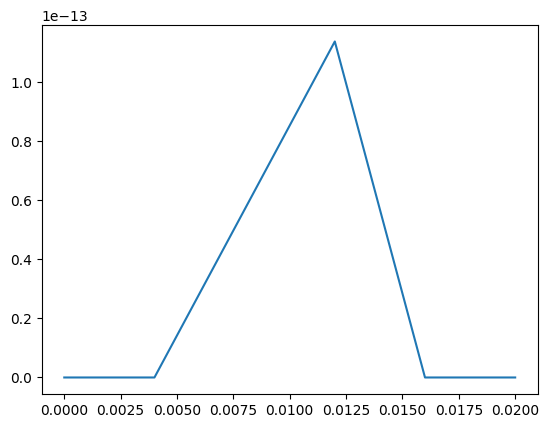

In [9]:
L=2*1e-2
k=0.5
q=1000*1e3
T_A=100+273
T_B=200+273

dx=[4*1e-3]

for j in range(len(dx)):
    num=int((L/dx[j])+1)
    
    a=np.zeros((num, num), dtype=np.float64)
    a[0][0] = 1
    a[num-1][num-1] = 1
    
    for i in range(1, num-1):
        a[i][i-1] = 1
        a[i][i]  = -2
        a[i][i+1] = 1
    
    b=(dx[j]**2)*(-q/k)*np.ones((num,1), dtype=np.float64)
    b[0]     = T_A
    b[num-1] = T_B
    
    num_sol=np.linalg.solve(a,b).squeeze(1)
    
    x=np.arange(0,L+dx[j],dx[j])
    ana_sol = analytical_soln(x, T_A, T_B, L, q, k)

    print(x)
    print(ana_sol)
    err=abs(num_sol-ana_sol)
    print(err)
    plt.plot(x, num_sol)
    plt.plot(x, ana_sol)
    plt.legend(["Numerical", "Analytical"], bbox_to_anchor=(1.45,1))
    plt.show()
    
    plt.plot(x, err)
    plt.show()